# Step 1: Read Data

In [1]:
import os
import sys
import subprocess
import pkg_resources


def get_sagemaker_version():
    "Return the version of 'sagemaker' in your kernel or -1 if 'sagemaker' is not installed"
    for i in pkg_resources.working_set:
        if i.key == "sagemaker":
            return "%s==%s" % (i.key, i.version)
    return -1


# Store original 'sagemaker' version
sagemaker_version = get_sagemaker_version()

# Install any missing dependencies
!{sys.executable} -m pip install -qU 'plotly' 'sagemaker>=2.15.0'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import *
import sklearn.model_selection

# SageMaker dependencies
import sagemaker
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve

# This instantiates a SageMaker session that we will be operating in.
session = sagemaker.Session()

# This object represents the IAM role that we are assigned.
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::235784900451:role/service-role/AmazonSageMaker-ExecutionRole-20220221T143904


In [2]:
df = pd.read_csv('https://query.data.world/s/od3jemny62m72nprm6rbnjo4j2jnxb', low_memory=False)  ## read from data source direactly
#df = pd.read_csv('covid19-activity.csv', low_memory=False)
print(df.info())
df["PEOPLE_DEATH_NEW_COUNT"] = abs(df["PEOPLE_DEATH_NEW_COUNT"])
df["PEOPLE_POSITIVE_NEW_CASES_COUNT"] = abs(df["PEOPLE_POSITIVE_NEW_CASES_COUNT"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941639 entries, 0 to 2941638
Data columns (total 13 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   PEOPLE_POSITIVE_CASES_COUNT      int64  
 1   COUNTY_NAME                      object 
 2   PROVINCE_STATE_NAME              object 
 3   REPORT_DATE                      object 
 4   CONTINENT_NAME                   object 
 5   DATA_SOURCE_NAME                 object 
 6   PEOPLE_DEATH_NEW_COUNT           int64  
 7   COUNTY_FIPS_NUMBER               float64
 8   COUNTRY_ALPHA_3_CODE             object 
 9   COUNTRY_SHORT_NAME               object 
 10  COUNTRY_ALPHA_2_CODE             object 
 11  PEOPLE_POSITIVE_NEW_CASES_COUNT  int64  
 12  PEOPLE_DEATH_COUNT               int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 291.8+ MB
None


In [8]:
df_latest = df[df["REPORT_DATE"] == "2022-04-25"]

In [3]:
df_usa = df[df["COUNTRY_ALPHA_3_CODE"]=="USA"]

In [4]:
df_latest = df_usa[df_usa["REPORT_DATE"] == "2022-04-25"]

In [5]:
df_latest

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
678,127998,Knox,Tennessee,2022-04-25,America,New York Times,0,47093.0,USA,United States,US,0,1377
2336,18757,DeKalb,Alabama,2022-04-25,America,New York Times,0,1049.0,USA,United States,US,2,326
3162,37742,Lee,Alabama,2022-04-25,America,New York Times,0,1081.0,USA,United States,US,42,338
3988,7550,Pike,Alabama,2022-04-25,America,New York Times,0,1109.0,USA,United States,US,21,134
4987,5063,Butler,Alabama,2022-04-25,America,New York Times,0,1013.0,USA,United States,US,0,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938159,2491,Mitchell,Iowa,2022-04-25,America,New York Times,0,19131.0,USA,United States,US,0,49
2938985,12502,Warren,Iowa,2022-04-25,America,New York Times,0,19181.0,USA,United States,US,0,134
2939811,9221,Geary,Kansas,2022-04-25,America,New York Times,0,20061.0,USA,United States,US,0,75
2940637,2260,Grant,Kansas,2022-04-25,America,New York Times,0,20067.0,USA,United States,US,0,36


In [6]:
df_usa_new_death_counts = pd.DataFrame(df_latest.groupby(["PROVINCE_STATE_NAME"])["PEOPLE_DEATH_COUNT"].sum().rename("death_cases")).reset_index(drop=False)

AttributeError: 'DataFrame' object has no attribute 'location'

In [7]:
df_usa_new_death_counts

,PROVINCE_STATE_NAME,death_cases
0,Alabama,19545
1,Alaska,1209
2,American Samoa,12
3,Arizona,29852
4,Arkansas,11373
5,California,90123
6,Colorado,12311
7,Connecticut,10834
8,Delaware,2905
9,District of Columbia,1335


In [8]:
df_usa_new_death_counts.drop(index =2)

,PROVINCE_STATE_NAME,death_cases
0,Alabama,19545
1,Alaska,1209
3,Arizona,29852
4,Arkansas,11373
5,California,90123
6,Colorado,12311
7,Connecticut,10834
8,Delaware,2905
9,District of Columbia,1335
10,Florida,73864


In [9]:
df_usa_new_death_counts.to_csv('Death_Count.csv')

In [7]:
df_usa_new_death_counts = pd.DataFrame(df_latest.groupby(["PROVINCE_STATE_NAME"])["PEOPLE_DEATH_COUNT"].sum().rename("death_cases")).reset_index(drop=False)
df_usa_new_death_counts = df_usa_new_death_counts.sort_values(by=["death_cases"], ascending=False)
df_usa_new_death_counts.tail(1)

,PROVINCE_STATE_NAME,death_cases
42,South Dakota,2901
30,New Hampshire,2475
35,North Dakota,2308
20,Maine,2280
51,Wyoming,1807
12,Hawaii,1404
9,District of Columbia,1335
1,Alaska,1209
46,Vermont,629
2,American Samoa,12


In [3]:
# Feature engineering to create label
df["survive_ratio"] = 1-df.PEOPLE_DEATH_COUNT/df.PEOPLE_POSITIVE_CASES_COUNT
df["dead_ratio"] = df.PEOPLE_DEATH_COUNT/df.PEOPLE_POSITIVE_CASES_COUNT
df["risk_label"] = [0 if x < 0.02380952 else 1 for x in df["dead_ratio"]]

In [4]:
df.head(5)

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,survive_ratio,dead_ratio,risk_label
0,2292,St. Louis city,Missouri,2020-06-18,America,New York Times,6,29510.0,USA,United States,US,58,148,0.935428,0.064572,1
1,2319,St. Louis city,Missouri,2020-06-19,America,New York Times,6,29510.0,USA,United States,US,27,154,0.933592,0.066408,1
2,2319,St. Louis city,Missouri,2020-06-20,America,New York Times,0,29510.0,USA,United States,US,0,154,0.933592,0.066408,1
3,2319,St. Louis city,Missouri,2020-06-21,America,New York Times,0,29510.0,USA,United States,US,0,154,0.933592,0.066408,1
4,2319,St. Louis city,Missouri,2020-06-22,America,New York Times,0,29510.0,USA,United States,US,0,154,0.933592,0.066408,1


In [5]:
df.to_csv("covid19-activity.csv", index=False)

In [4]:
df_usa = df[df["COUNTRY_ALPHA_3_CODE"]=="USA"]
df_usa_new_case_counts = pd.DataFrame(df_usa.groupby(["PROVINCE_STATE_NAME", "CONTINENT_NAME"])["PEOPLE_POSITIVE_NEW_CASES_COUNT"].sum().rename("sum_new_cases")).reset_index(drop=False)
df_usa_new_case_counts = df_usa_new_case_counts.sort_values(by=["sum_new_cases"], ascending=False)
df_usa_new_case_counts.head(10)

,PROVINCE_STATE_NAME,CONTINENT_NAME,sum_new_cases
10,Florida,America,11786914
5,California,America,9359895
44,Texas,America,7034976
33,New York,America,5119088
14,Illinois,America,3161430
43,Tennessee,America,3003649
39,Pennsylvania,America,2824661
36,Ohio,America,2692717
34,North Carolina,America,2665048
11,Georgia,America,2580557


In [6]:
df_usa_new_death_counts = pd.DataFrame(df_usa.groupby(["PROVINCE_STATE_NAME"])["PEOPLE_DEATH_COUNT"].sum().rename("death_cases")).reset_index(drop=False)
df_usa_new_death_counts = df_usa_new_death_counts.sort_values(by=["death_cases"], ascending=False)
df_usa_new_death_counts.tail(10)

,PROVINCE_STATE_NAME,death_cases
27,Montana,1074080
35,North Dakota,930498
30,New Hampshire,871297
9,District of Columbia,700945
20,Maine,593684
51,Wyoming,534735
12,Hawaii,398158
1,Alaska,305194
46,Vermont,183945
2,American Samoa,232


In [5]:
del df_usa['COUNTY_FIPS_NUMBER']

In [6]:
del df_usa['CONTINENT_NAME']

In [7]:
del df_usa['DATA_SOURCE_NAME']

In [8]:
del df_usa['COUNTRY_ALPHA_2_CODE']

In [9]:
del df_usa['COUNTRY_SHORT_NAME']

In [10]:
del df_usa['COUNTY_NAME']

In [13]:
df_usa

,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_ALPHA_3_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,survive_ratio,dead_ratio,risk_label
0,2292,Missouri,2020-06-18,6,USA,58,148,0.935428,0.064572,1
1,2319,Missouri,2020-06-19,6,USA,27,154,0.933592,0.066408,1
2,2319,Missouri,2020-06-20,0,USA,0,154,0.933592,0.066408,1
3,2319,Missouri,2020-06-21,0,USA,0,154,0.933592,0.066408,1
4,2319,Missouri,2020-06-22,0,USA,0,154,0.933592,0.066408,1
...,...,...,...,...,...,...,...,...,...,...
2874051,2195,Missouri,2020-06-13,0,USA,16,141,0.935763,0.064237,1
2874052,2206,Missouri,2020-06-14,0,USA,11,141,0.936083,0.063917,1
2874053,2219,Missouri,2020-06-15,0,USA,13,141,0.936458,0.063542,1
2874054,2219,Missouri,2020-06-16,0,USA,0,141,0.936458,0.063542,1


In [14]:
df_usa_new_case_counts.to_csv("df_usa_new_case_counts", index=False)

In [15]:
df_usa_new_case_counts.tail(10)

,PROVINCE_STATE_NAME,CONTINENT_NAME,sum_new_cases
8,Delaware,America,264237
1,Alaska,America,251428
35,North Dakota,America,248206
20,Maine,America,240612
42,South Dakota,America,238948
12,Hawaii,America,235959
51,Wyoming,America,157394
46,Vermont,America,155940
9,District of Columbia,America,137627
2,American Samoa,America,4957


In [16]:
print("Start Report Date: ", df_usa["REPORT_DATE"].min())
print("End Report Date: ", df_usa["REPORT_DATE"].max())

Start Report Date:  2020-01-21
End Report Date:  2022-04-07


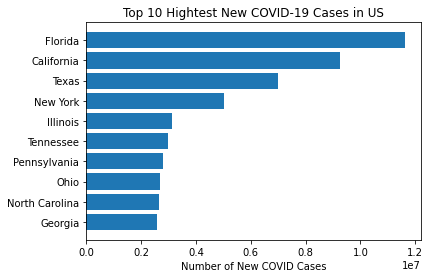

In [17]:
fig, ax = plt.subplots()

x_val = df_usa_new_case_counts["PROVINCE_STATE_NAME"].head(10)
y_val = df_usa_new_case_counts["sum_new_cases"].head(10)

hbars = ax.barh(x_val, y_val)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of New COVID Cases')
ax.set_title('Top 10 Hightest New COVID-19 Cases in US')
plt.show()

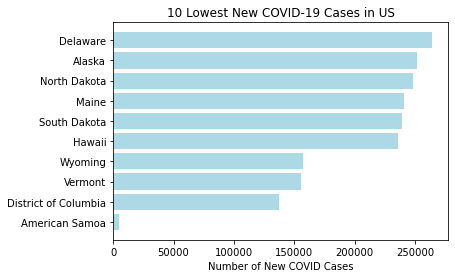

In [18]:
fig, ax = plt.subplots()

x_val = df_usa_new_case_counts["PROVINCE_STATE_NAME"].iloc[-10:]
y_val = df_usa_new_case_counts["sum_new_cases"].iloc[-10:]

hbars = ax.barh(x_val, y_val, color="lightblue")
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of New COVID Cases')
ax.set_title('10 Lowest New COVID-19 Cases in US')
plt.show()

In [19]:
class_label_counts = pd.DataFrame(df_usa.groupby(by=["risk_label"])["risk_label"].count().rename("counts")).reset_index()
print("The ratio of risk over low-risk label: ", 100*(class_label_counts.counts[1]/class_label_counts.counts[0]), "%")
class_label_counts

The ratio of risk over low-risk label:  48.87060617965843 %


,risk_label,counts
0,0,1730840
1,1,845872


### To do : plot daily case using line graph

# Step 2: Describe Feature Information

In [11]:
numeric_df = df.loc[:, ["risk_label", "dead_ratio", "survive_ratio", "PEOPLE_POSITIVE_CASES_COUNT", "PEOPLE_DEATH_NEW_COUNT", "PEOPLE_POSITIVE_NEW_CASES_COUNT", "PEOPLE_DEATH_COUNT"]]
display(numeric_df.describe())

,risk_label,dead_ratio,survive_ratio,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,2.874056e+06,2.593796e+06,2.593796e+06,2.874056e+06,2.874056e+06,2.874056e+06,2.874056e+06
mean,3.231426e-01,inf,-inf,3.979957e+04,2.201837e+00,1.769202e+02,7.677434e+02
std,4.676768e-01,NaN,NaN,5.790862e+05,3.722082e+01,3.522059e+03,1.091486e+04
min,0.000000e+00,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,8.882083e-03,9.761905e-01,1.400000e+02,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,1.553551e-02,9.844645e-01,1.325000e+03,0.000000e+00,1.000000e+00,2.300000e+01
75%,1.000000e+00,2.380952e-02,9.911179e-01,5.351000e+03,0.000000e+00,1.300000e+01,9.000000e+01
max,1.000000e+00,inf,1.000000e+00,4.303307e+07,1.144700e+04,8.473710e+05,6.612280e+05


In [12]:
nonumeric_df_usa = df_usa.loc[:, ["risk_label","dead_ratio","survive_ratio", "PEOPLE_POSITIVE_CASES_COUNT", "PEOPLE_DEATH_NEW_COUNT", "PEOPLE_POSITIVE_NEW_CASES_COUNT", "PEOPLE_DEATH_COUNT", "PROVINCE_STATE_NAME"]]

In [13]:
nonumeric_df_usa

,risk_label,dead_ratio,survive_ratio,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,PROVINCE_STATE_NAME
0,1,0.064572,0.935428,2292,6,58,148,Missouri
1,1,0.066408,0.933592,2319,6,27,154,Missouri
2,1,0.066408,0.933592,2319,0,0,154,Missouri
3,1,0.066408,0.933592,2319,0,0,154,Missouri
4,1,0.066408,0.933592,2319,0,0,154,Missouri
...,...,...,...,...,...,...,...,...
2874051,1,0.064237,0.935763,2195,0,16,141,Missouri
2874052,1,0.063917,0.936083,2206,0,11,141,Missouri
2874053,1,0.063542,0.936458,2219,0,13,141,Missouri
2874054,1,0.063542,0.936458,2219,0,0,141,Missouri


In [14]:
nonumeric_df_usa = pd.DataFrame(nonumeric_df_usa.groupby(["PROVINCE_STATE_NAME"])["dead_ratio"].mean().reset_index(drop=False))
nonumeric_df_usa = nonumeric_df_usa.sort_values(by=["dead_ratio"], ascending=True)

In [15]:
nonumeric_df_usa.head(10)

,PROVINCE_STATE_NAME,dead_ratio
2,American Samoa,0.000016
1,Alaska,0.003797
51,Wyoming,0.011885
13,Idaho,0.012659
38,Oregon,0.014852
26,Missouri,0.016066
8,Delaware,0.016746
34,North Carolina,0.017227
6,Colorado,0.017510
20,Maine,0.017781


In [16]:
numeric_df_usa = df_usa.loc[:, ["risk_label","dead_ratio","survive_ratio", "PEOPLE_POSITIVE_CASES_COUNT", "PEOPLE_DEATH_NEW_COUNT", "PEOPLE_POSITIVE_NEW_CASES_COUNT", "PEOPLE_DEATH_COUNT"]]
display(numeric_df_usa.describe())

,risk_label,dead_ratio,survive_ratio,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,2.576712e+06,2.325230e+06,2.325230e+06,2.576712e+06,2.576712e+06,2.576712e+06,2.576712e+06
mean,3.282757e-01,inf,-inf,8.560959e+03,4.365602e-01,3.502834e+01,1.389039e+02
std,4.695858e-01,NaN,NaN,4.243040e+04,9.333249e+00,6.188434e+02,7.585202e+02
min,0.000000e+00,0.000000e+00,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,9.863429e-03,9.759519e-01,1.330000e+02,0.000000e+00,0.000000e+00,2.000000e+00
50%,0.000000e+00,1.600541e-02,9.839946e-01,1.280000e+03,0.000000e+00,1.000000e+00,2.300000e+01
75%,1.000000e+00,2.404810e-02,9.901366e-01,4.812000e+03,0.000000e+00,1.200000e+01,8.400000e+01
max,1.000000e+00,inf,1.000000e+00,2.840184e+06,1.131700e+04,3.702510e+05,4.010000e+04


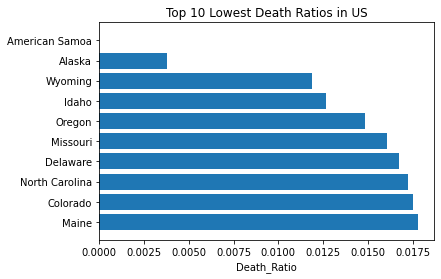

In [19]:
fig, ax = plt.subplots()

x_val = nonumeric_df_usa["PROVINCE_STATE_NAME"].head(10)
y_val = nonumeric_df_usa["dead_ratio"].head(10)

hbars = ax.barh(x_val, y_val)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Death_Ratio')
ax.set_title('Top 10 Lowest Death Ratios in US')
plt.show()

# Step 3: Plot on Feature Correlation

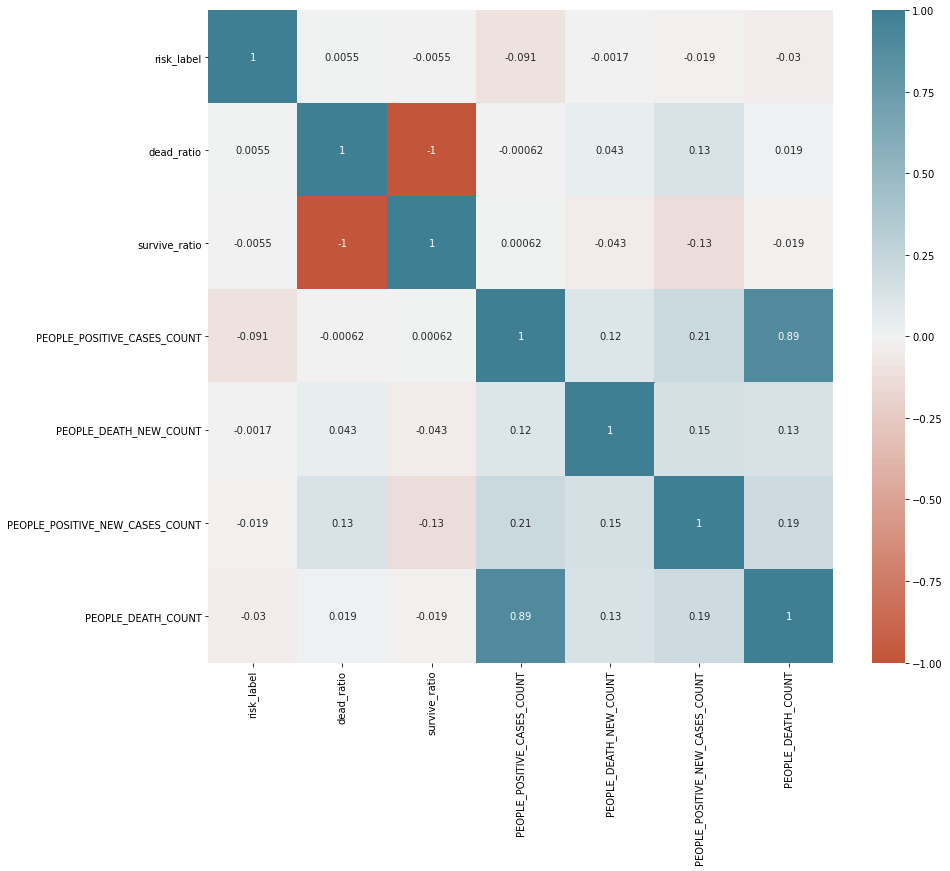

In [27]:
plt.figure(figsize=(14, 12))
cor = numeric_df_usa.corr()
sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

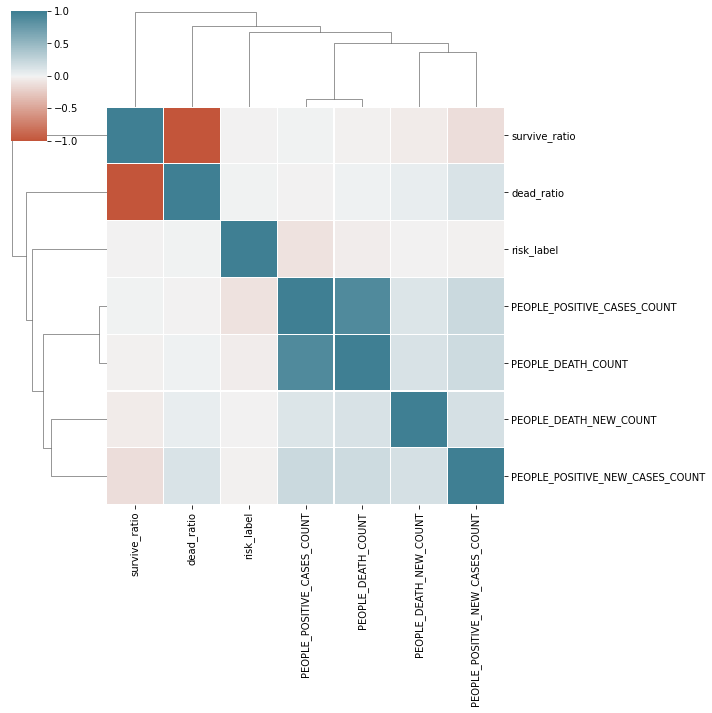

In [28]:
cluster_map = sns.clustermap(cor, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.1)
plt.setp(cluster_map.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cluster_map

# Step 4: Partition Dataset into Train, Test, Validation Splits

In [29]:
del df_usa['REPORT_DATE']

In [30]:
del df_usa['COUNTRY_ALPHA_3_CODE']

In [31]:
df_usa.columns

Index(['PEOPLE_POSITIVE_CASES_COUNT', 'PROVINCE_STATE_NAME',
       'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT',
       'PEOPLE_DEATH_COUNT', 'survive_ratio', 'dead_ratio', 'risk_label'],
      dtype='object')

In [32]:
x_cols = ['PEOPLE_POSITIVE_CASES_COUNT', 'PROVINCE_STATE_NAME',
       'PEOPLE_DEATH_NEW_COUNT',
       'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_COUNT']
y_col = ["risk_label"]

X = df_usa.loc[:, x_cols] 
Y = df_usa.loc[:, y_col] 

In [33]:
X

,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,2292,Missouri,6,58,148
1,2319,Missouri,6,27,154
2,2319,Missouri,0,0,154
3,2319,Missouri,0,0,154
4,2319,Missouri,0,0,154
...,...,...,...,...,...
2874051,2195,Missouri,0,16,141
2874052,2206,Missouri,0,11,141
2874053,2219,Missouri,0,13,141
2874054,2219,Missouri,0,0,141


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
one_hot_encoded_data = pd.get_dummies(X, columns = ['PROVINCE_STATE_NAME'])
X = one_hot_encoded_data
print(one_hot_encoded_data)

         PEOPLE_POSITIVE_CASES_COUNT  PEOPLE_DEATH_NEW_COUNT  \
0                               2292                       6   
1                               2319                       6   
2                               2319                       0   
3                               2319                       0   
4                               2319                       0   
...                              ...                     ...   
2874051                         2195                       0   
2874052                         2206                       0   
2874053                         2219                       0   
2874054                         2219                       0   
2874055                         2234                       1   

         PEOPLE_POSITIVE_NEW_CASES_COUNT  PEOPLE_DEATH_COUNT  \
0                                     58                 148   
1                                     27                 154   
2                                      

In [36]:
Y

,risk_label
0,1
1,1
2,1
3,1
4,1
...,...
2874051,1
2874052,1
2874053,1
2874054,1


In [37]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
!pip install imbalanced-learn

In [39]:
#from imblearn.under_sampling import RandomUnderSampler

In [40]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_over, y_over = undersample.fit_resample(X, Y)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, Y_train)
os_data_X = pd.DataFrame(data=df_usa,columns=columns )
os_data_y= pd.DataFrame(data=df_usa,columns=['risk_label'])
# we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [41]:
X.shape

(2576712, 56)

In [42]:
Y.shape

(2576712, 1)

In [43]:
# We partition the dataset into 2/3 training and 1/3 test set.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33)

# We further split the training set into a validation set i.e., 2/3 training set, and 1/3 validation set
#X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
 #   X_train, Y_train, test_size=0.33
#)

In [44]:
X_train

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,PROVINCE_STATE_NAME_Alabama,PROVINCE_STATE_NAME_Alaska,PROVINCE_STATE_NAME_American Samoa,PROVINCE_STATE_NAME_Arizona,PROVINCE_STATE_NAME_Arkansas,PROVINCE_STATE_NAME_California,...,PROVINCE_STATE_NAME_South Dakota,PROVINCE_STATE_NAME_Tennessee,PROVINCE_STATE_NAME_Texas,PROVINCE_STATE_NAME_Utah,PROVINCE_STATE_NAME_Vermont,PROVINCE_STATE_NAME_Virginia,PROVINCE_STATE_NAME_Washington,PROVINCE_STATE_NAME_West Virginia,PROVINCE_STATE_NAME_Wisconsin,PROVINCE_STATE_NAME_Wyoming
1424150,159,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444981,3318,0,7,65,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2385396,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2850789,94,3,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1723935,4971,0,30,159,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405455,294,0,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1004797,31703,0,0,935,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1641681,3345,0,13,68,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1341334,570,0,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Ye = Y_train.values.ravel()

In [46]:
X_train.to_csv("X_train.csv", index=False) 
X_test.to_csv("X_test.csv", index=False)
#X_val.to_csv("X_val.csv", index=False)

Y_train.to_csv("Y_train.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)
#Y_val.to_csv("Y_val.csv", index=False)

In [47]:
pip install scikit-learn==0.24.2

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg = LogisticRegression(solver='liblinear', max_iter=500)
logreg.fit(X_train, Ye)

LogisticRegression(max_iter=500, solver='liblinear')

In [50]:
y_pred=logreg.predict(X_test)

Text(0.5, 15.0, 'Predicted')

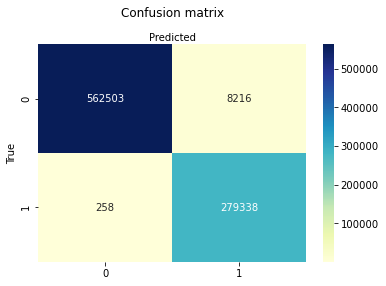

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [52]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


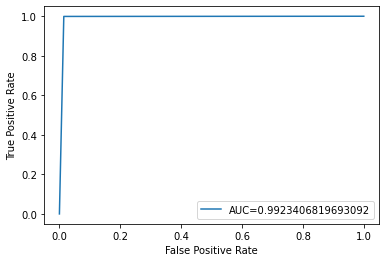

In [53]:
auc = metrics.roc_auc_score(Y_test, y_pred)

#create ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()